## Overview  

The below Content Based Recommendation System is a follow along tutorial from an Udemy Machine Learning class;

https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/

**Problem Statement**

Given a dataset of viewer movie ratings; create a Recommendation System based on similiary of the movies. The supplied dataset is a subset of the MovieLens - Movie Recommendation Data Sets http://www.grouplens.org/node/73

## Table of Contents  

* [Import Libraries](#import_libraries)
* [Import Data](#import_data)
* [Create DataFrame and Descriptive Metrics](#create_dataframe)
* [Data Preprocessing; check for nulls](#data_preprocessing)
* [Exploratory Data Analysis](#explore_data)
* [Create Recommendation System](#rec_sys)

<a class="anchor" id="import_libraries"></a>
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a class="anchor" id="import_data"></a>
## Import Data

In [19]:
#define column_names and import data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [20]:
df.columns

Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')

In [21]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [22]:
#retrieve .csv training dataset label attributes
movie_titles = pd.read_csv("Movie_Id_Titles")

In [23]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [24]:
#add training lables to training feature dataset
df = pd.merge(df,movie_titles,on='item_id')

In [25]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


<a class="anchor" id="create_dataframe"></a>
## Create DataFrame and Descriptive Metrics

In [10]:
#verify desired columns are present; the 'target' values are missing so append target values as new column to dataset
df.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'title_x', 'title_y'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title_x    100003 non-null  object
 5   title_y    100003 non-null  object
dtypes: int64(4), object(2)
memory usage: 4.6+ MB


In [12]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


<a class="anchor" id="data_preprocessing"></a>
## Data Preprocessing; check for nulls  

In [13]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title_x      0
title_y      0
dtype: int64

**Missing Data**

<AxesSubplot:>

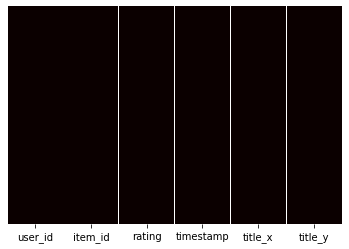

In [14]:
#we can use seaborn to create a heatmap to see where we are missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='hot')
#white bars represent where train.isnull() is true (missing data)

<a class="anchor" id="explore_data"></a>
## Exploratory Data Analysis

Understanding the relationship between the feature attributes and the target variable

In [36]:
#sns.pairplot(df)

Lets explore dataset, by ratings

In [27]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [29]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

Create a dataframe, by average rating and number of ratings, per title

In [30]:
#Create dataframe of average rating per title
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [31]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [ ]:
#add column of count per title

In [33]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [34]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

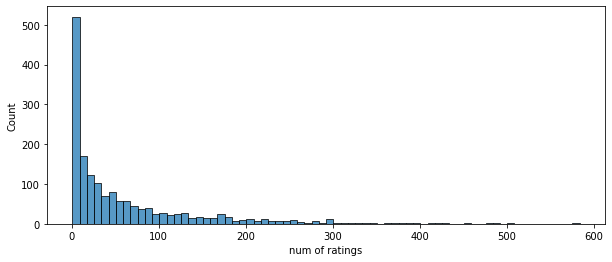

In [39]:
plt.figure(figsize=(10,4))
sns.histplot(x='num of ratings', data=ratings,bins=70)

<AxesSubplot:xlabel='rating', ylabel='Count'>

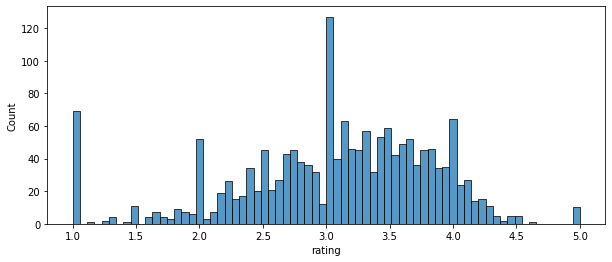

In [40]:
plt.figure(figsize=(10,4))
sns.histplot(x='rating', data=ratings,bins=70)

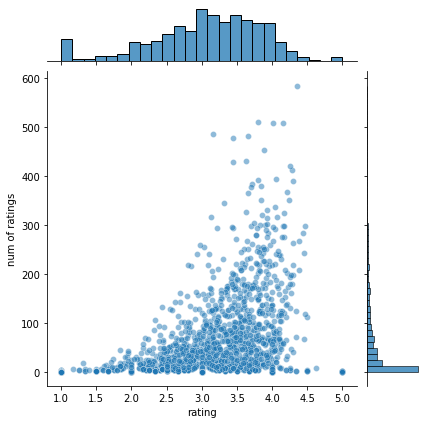

In [42]:
sns.jointplot(x='rating',y='num of ratings',data=ratings, alpha =0.5)

<a class="anchor" id="rec_sys"></a>
## Create Recommendation System

Create **Martix** of User Id and Title, with the movie ratings as the values

In [47]:
moviemat = df.pivot_table(values='rating',index='user_id',columns='title')

In [48]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Select two movies to create similarities of

In [53]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [54]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Use pd.corrwith() method to get the similarity b/w two pandas series

In [63]:
#this is a correlation of all the ratings of all the movies in the moviemat matrix, with the ratings of 'Star Wars (1977)'
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [64]:
similar_to_starwars.head().sort_values(ascending=False)

title
'Til There Was You (1997)    0.872872
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
1-900 (1994)                -0.645497
dtype: float64

In [65]:
#this is a correlation of all the ratings of all the movies in the moviemat matrix, with the ratings of 'Liar Liar (1997)'
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [66]:
similar_to_liarliar.head().sort_values(ascending=False)

title
101 Dalmatians (1996)        0.469765
187 (1997)                   0.175145
'Til There Was You (1997)    0.118913
12 Angry Men (1957)          0.066272
1-900 (1994)                      NaN
dtype: float64

Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [69]:
corr_starwars= pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [70]:
corr_starwars.dropna(inplace=True)

In [71]:
#this is the correlation of the user rating of the tilte listed, to the user ratings of Star Wars
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [73]:
# strong correlations that dont make intuitive sense, may be resulting in a strong correlation because those titles 
# have only been viewed by few (or one) person, who happend to give that title AND Star Wars high ratings

#A possible work around/correction for this could be to implement a threshold on the number of viewers required to include ratings for that title (omit titles with few viewers)
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

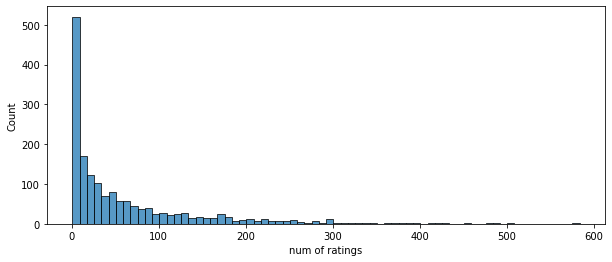

In [74]:
#Based on the count of viewers, there appears to be a big drop off in viewer after 100, so this may be a good threshold to implement
plt.figure(figsize=(10,4))
sns.histplot(x='num of ratings', data=ratings,bins=70)

In [78]:
#join (not merge) correlation DataFrame with Ratings DataFrame to include count of ratings
corr_starwars = corr_starwars.join(ratings['num of ratings']) 

In [80]:
corr_starwars.sort_values('num of ratings', ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
Contact (1997),0.134962,509
Fargo (1996),0.044415,508
Return of the Jedi (1983),0.672556,507
Liar Liar (1997),0.150292,485
...,...,...
"Glass Shield, The (1994)",-1.000000,2
"To Have, or Not (1995)",-1.000000,2
Golden Earrings (1947),1.000000,2


In [89]:
#now we can filter out based on number of ratings

#can sort to check if correlation makes more intuitive sense
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [92]:
corr_liarliar= pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings']) 
corr_liarliar[corr_liarliar['num of ratings']>25].sort_values('Correlation', ascending=False)

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Deceiver (1997),0.851467,29
My Man Godfrey (1936),0.700794,27
"Prophecy, The (1995)",0.685905,32
Bio-Dome (1996),0.680800,31
...,...,...
Jeffrey (1995),-0.409048,34
East of Eden (1955),-0.411549,59
Airheads (1994),-0.431418,32
